In [2]:
from fastai.vision import *

In [2]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
path = Config.data_path()/'x-ray'
path.mkdir(parents=True, exist_ok=True)

In [4]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99%|█████████████████████████████████████▋| 1.14G/1.15G [00:13<00:00, 88.6MB/s]
100%|██████████████████████████████████████| 1.15G/1.15G [00:13<00:00, 93.2MB/s]
unzip:  cannot find or open /home/ubuntu/.fastai/data/x-ray/chest-xray-pneumonnia.zip, /home/ubuntu/.fastai/data/x-ray/chest-xray-pneumonnia.zip.zip or /home/ubuntu/.fastai/data/x-ray/chest-xray-pneumonnia.zip.ZIP.


In [19]:
! unzip -q -n {path}/chest_xray.zip -d {path}

In [3]:
path = 'data/x_ray/chest_xray'

In [4]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,
                                  train='train',
                                  valid='val',
                                  test='test',
                                  size=224,
                                  bs=64,
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms())

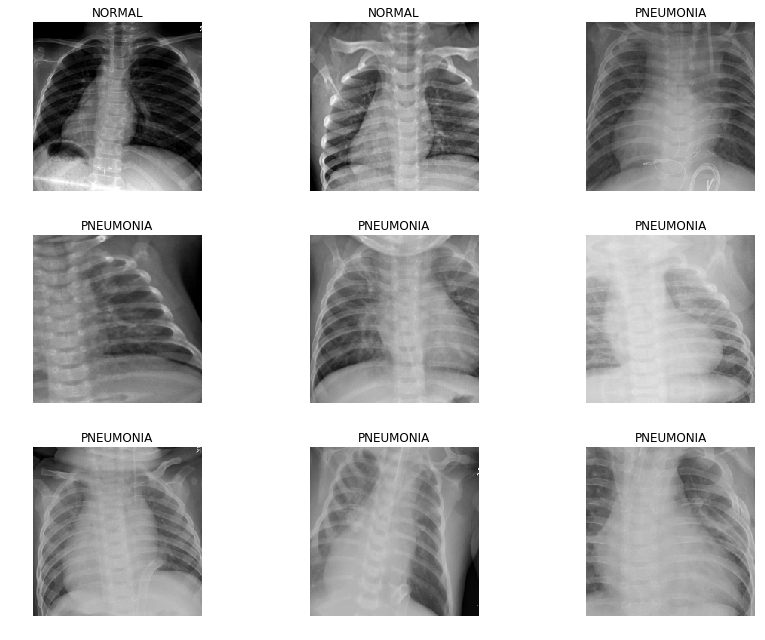

In [41]:
data.show_batch(rows=3, figsize=(12,9))

In [6]:
data.classes

['NORMAL', 'PNEUMONIA']

In [7]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
learn.fit_one_cycle(4,max_lr=1e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.397162,0.163157,0.058924,02:38
1,0.227757,0.168117,0.050384,02:27
2,0.166680,0.142585,0.040991,02:26
3,0.139501,0.121863,0.035013,02:25


In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


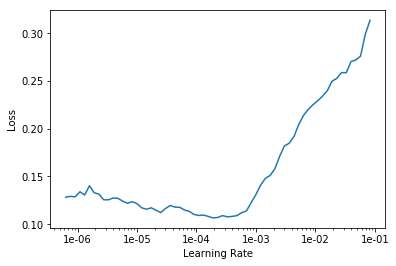

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(10, max_lr=slice(1e-06,(1e-03)/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.106477,0.124674,0.035867,02:32
1,0.117973,0.114915,0.035867,02:32
2,0.114157,0.109320,0.029035,02:32
3,0.116174,0.094812,0.029035,02:31
4,0.095120,0.107150,0.036721,02:33
5,0.082271,0.106948,0.038429,02:32
6,0.077377,0.099183,0.030743,02:32
7,0.072617,0.087164,0.027327,02:32
8,0.071921,0.077250,0.023911,02:31
9,0.067405,0.087229,0.027327,02:32


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

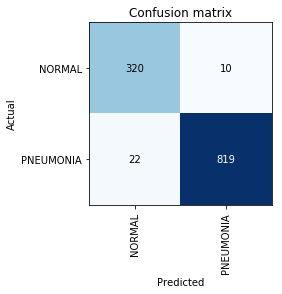

In [14]:
interp.plot_confusion_matrix()

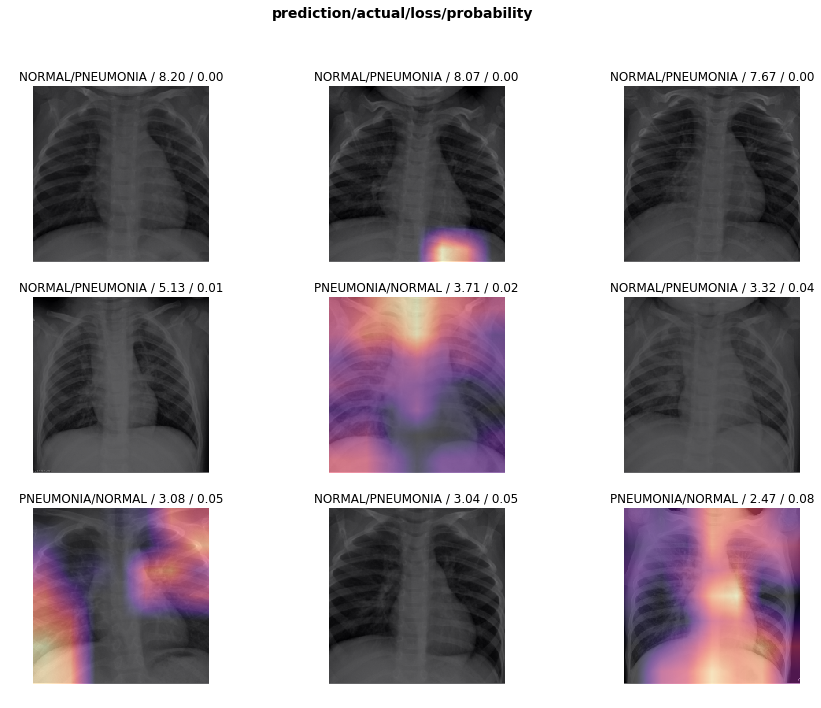

In [18]:
interp.plot_top_losses(9,figsize=(15,11))